In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

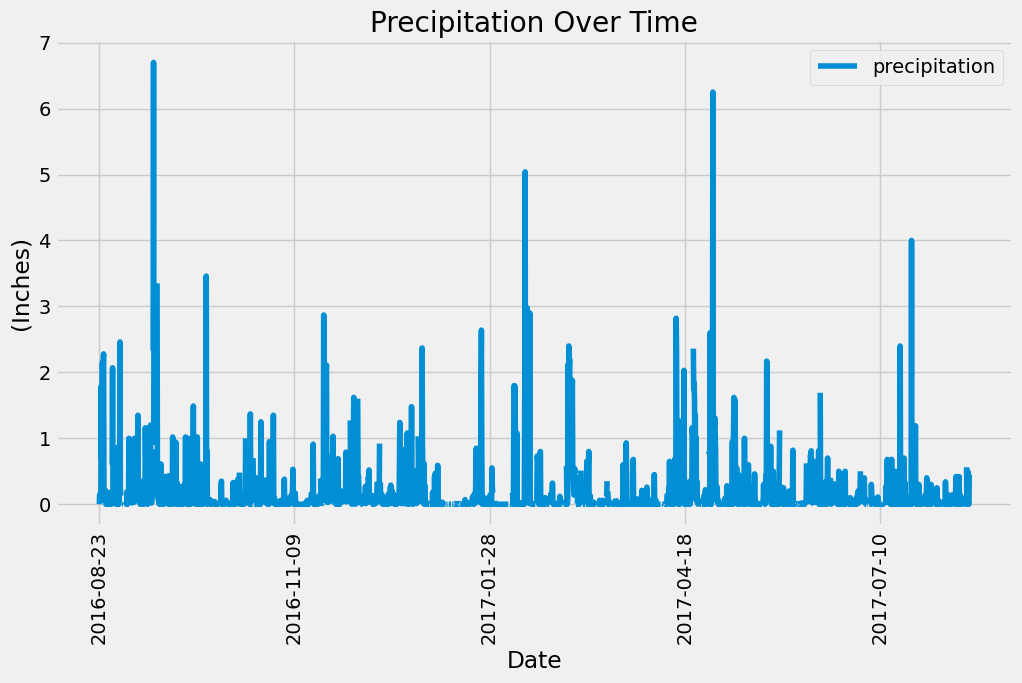

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
query_result = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(query_result, columns=['date', 'prcp'])

# Sort the dataframe by date
last_year_df = last_year_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
plot = last_year_df.plot(x='date', y='prcp', kind='line', figsize=(11, 6), legend=True)
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('(Inches)')
plot.legend(['precipitation'])

plt.xticks(rotation=90)

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
mean = last_year_df['prcp'].mean()
std_dev = last_year_df['prcp'].std()
median = last_year_df['prcp'].median()
print(f"Mean :", mean ,"Median:", median, "Standard Deviation:", std_dev)

Mean : 0.17727857496288968 Median: 0.02 Standard Deviation: 0.46118950388770263


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()



9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_result = session.query(measurement.station, func.count()).\
    group_by(measurement.station).\
    order_by(func.count().desc()).all()

for station, count in query_result:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query_result = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.tobs).all()

df = pd.DataFrame(query_result)
lowest = df['tobs'].min()
highest = df['tobs'].max()
mean = df['tobs'].mean()

print(f"Lowest temp recorded:", lowest, ", Highest temp recorded:", highest, ", Average temp recorded:", mean)
   

Lowest temp recorded: 54.0 , Highest temp recorded: 85.0 , Average temp recorded: 71.66378066378067


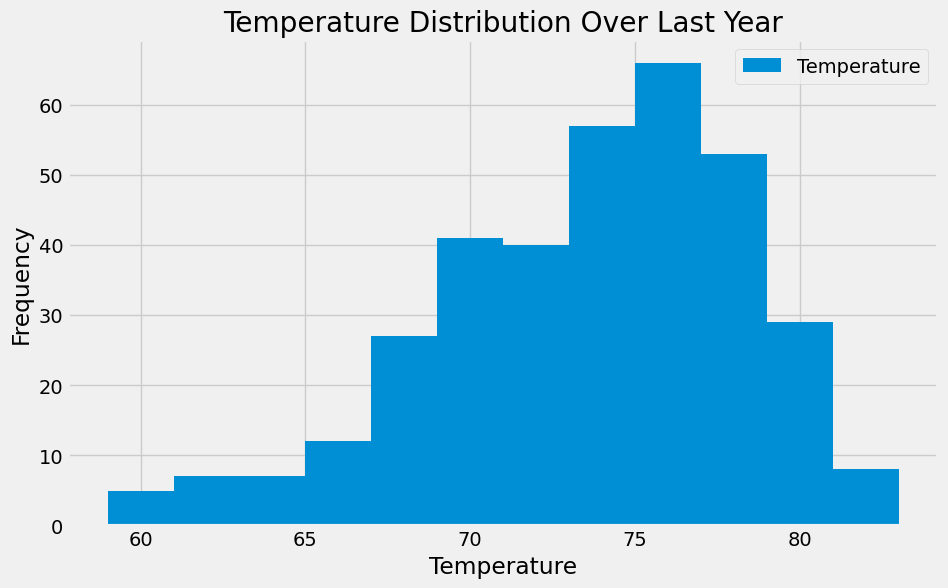

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_result = session.query(measurement.station, measurement.tobs, measurement.date).\
    filter(measurement.station == 'USC00519281', measurement.date >= '2016-08-23').\
    order_by(measurement.tobs).all()

df = pd.DataFrame(query_result)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['tobs'], bins=12)

# Adding labels and title
plt.title('Temperature Distribution Over Last Year')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['Temperature'])

# Show the plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()